# Plot

**Table of contents**<a id='toc0_'></a>    
- 1. [2-Dimensional plot](#toc1_)    
  - 1.1. [Calculate an utility function on a vector](#toc1_1_)    
  - 1.2. [Plot the utility function in 2-dimensions](#toc1_2_)    
- 2. [3-Dimensional plots](#toc2_)    
  - 2.1. [Calculate an utility function on a grid](#toc2_1_)    
  - 2.2. [Plot the utility function](#toc2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Plotting figures using the library **[matplotlib](https://matplotlib.org/)**.

- **matplotlib**: [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py), [documentation](https://matplotlib.org/users/index.html), [styles](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

**Other plotting libraries:** [seaborn](https://seaborn.pydata.org/) and [bokeh](https://bokeh.pydata.org/en/latest/).

## 1. <a id='toc1_'></a>[2-Dimensional plot](#toc0_)

### 1.1. <a id='toc1_1_'></a>[Calculate an utility function on a vector](#toc0_)


Consider a Cobb-Douglas utility function

$$
u(x_1,x_2) = x_1^{\alpha}x_2^{1-\alpha}
$$

For now we fix $\alpha$ at 0.5, and $x_{2}$ at 1. And calculate utility across $x_{1}$.

In [1]:
def u_func(x1,x2,alpha=0.50):
    return x1**alpha * x2**(1-alpha)

In [2]:
import numpy as np

In [3]:
# Fixed value of x2 
x2 = 1

# Number points 
N = 1000

# Max value of x1
x_max = 100 

# Create a vector x1 from 0 to x_max, with N values
x1_vec = np.linspace(0,x_max,N)

# Create an empty vector to store values of u 
u_vec = np.empty(N)

# Fill out out the vector
for i, x1 in enumerate(x1_vec):
    u_vec[i] = u_func(x1,x2)

# Alternatively we could just create the array using the power of numpy arrays
u_vec = u_func(x1_vec,x2)

### 1.2. <a id='toc1_2_'></a>[Plot the utility function in 2-dimensions](#toc0_)

Import modules and state that the figures should be inlined:

In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt # baseline module

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})


**Constructing a plot-object in matplotlib**
1. `fig` is the figure object. It's the main "canvas" you are adding elements to.
2. `ax` is a reference to a specific subplot on the canvas (only one here)
3. Use the `ax` reference to put a diagram into the empty subplot

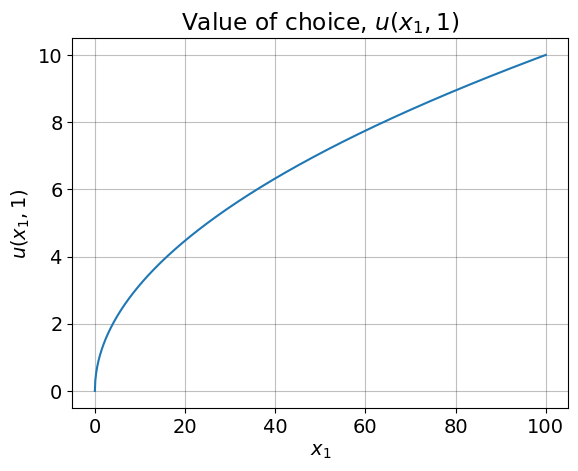

In [5]:
# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,u_vec)

ax.set_title('Value of choice, $u(x_1,1)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,1)$');

But what if $x_{2}$ changes?, e.g. $x_{2}=2$

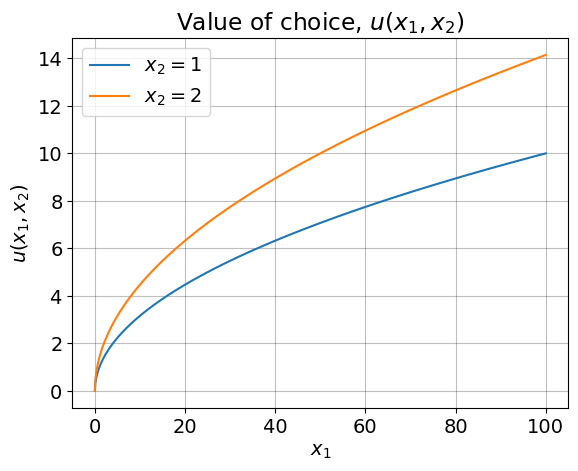

In [8]:
# Calculate secondary u_vec 
x2 = 2
u_vec_2 = u_func(x1_vec,x2)

# a. create the figure
fig = plt.figure()

# b. create the plot 
ax = fig.add_subplot(1,1,1)

ax.plot(x1_vec,u_vec,label='$x_{2}=1$')
ax.plot(x1_vec,u_vec_2,label='$x_{2}=2$')

ax.set_title('Value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left'); # Activate legend (uses the labels in ax.plot())


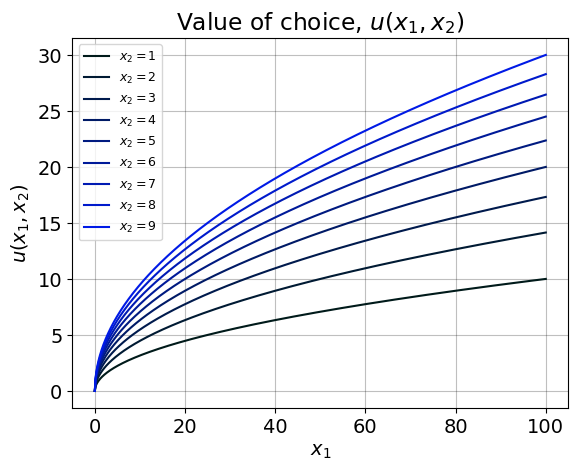

In [9]:
# a. create the figure
fig = plt.figure()

# b. 
ax = fig.add_subplot(1,1,1)

n = 10
for x2 in range(1,n):
    u_vec_x2 = u_func(x1_vec,x2)
    ax.plot(x1_vec,u_vec_x2,label='$x_{2}=$'+str(x2),c=(0.,0.1,x2/n)) # c is the color, the argument is the color in rgb format (in percentages of 255)

ax.set_title('Value of choice, $u(x_1,x_2)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,x_2)$')
ax.legend(loc='upper left',prop={'size':9}); # Activate legend (uses the labels in ax.plot())


## 2. <a id='toc2_'></a>[3-Dimensional plots](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Calculate an utility function on a grid](#toc0_)

In order to describe the shape of our utility function across both $x_{1}$ and $x_{2}$, we need to numerically evaluate it on a set of points. 

Thus, we calculate the utility function on a **2-dimensional grid** (`x1` and `x2`) with $N$ elements in each dimension:

In [10]:
# a. settings
N = 100 # number of elements
x_max = 10 # maximum value

# b. allocate 2d numpy arrays for x1 and x2
shape_tuple = (N,N)
x1_values = np.empty(shape_tuple) # allocate 2d numpy array with shape=(N,N)
x2_values = np.empty(shape_tuple)
u_values = np.empty(shape_tuple)

# c. fill numpy arrays using a nested loop
for i in range(N): # 0,1,...,N-1
    for j in range(N): # 0,1,...,N-1
        x1_values[i,j] = (i/(N-1))*x_max # in [0,x_max]
        x2_values[i,j] = (j/(N-1))*x_max # in [0,x_max]
        u_values[i,j] = u_func(x1_values[i,j],x2_values[i,j],alpha=0.25)

**Note:** x1_values and x2_values are **both 2d**.  
This is not strictly necessary in the present case. 1d arrays would suffice below in the nested loop and filling out of u_values.  
However, it makes them isomorphic with the mesh grids used for countour plots, which often need 2d mesh grids. 

**Alternatively:** Use the corresponding numpy function to create your grid:

In [11]:
# a. Create numbers distributed evenly between 0 and x_max
x_vec = np.linspace(0,x_max,N)

# b. Create meshgrids similar to x1_values and x2_values above
x1_mesh,x2_mesh = np.meshgrid(x_vec,x_vec,indexing='ij')

print('Dimension of grid over x1 (same as x2): ', x1_mesh.shape) # Note that the grid is 2d. u_func needs 2d to calculate element by element. 
u_values_mesh = u_func(x1_mesh, x2_mesh, alpha=0.25)

Dimension of grid over x1 (same as x2):  (100, 100)


* How could `u_func` evaluate utility on x1_mesh and x2_mesh?  
* Because numpy does everything *element-by-element*.  
* Do you see why we **needed** a mesh grid instead of `x1_values = x_vec`?

**Mesh grids** are a little tricky to understand, but important for creating surface plots. You can read more at:  
[GeeksforGeeks](https://www.geeksforgeeks.org/numpy-meshgrid-function/), [stack overflow](https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy) and the [numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)

Test whether the results are the same:

In [12]:
# a. maximum absolute difference
max_abs_diff = np.max(np.abs(u_values-u_values_mesh))
print(max_abs_diff) # very close to zero     

# b. test if all values are "close"
print(np.allclose(u_values,u_values_mesh))

2.6645352591003757e-15
True


**Note:** The results are not exactly the same due to floating point arithmetics.

### 2.2. <a id='toc2_2_'></a>[Plot the utility function](#toc0_)

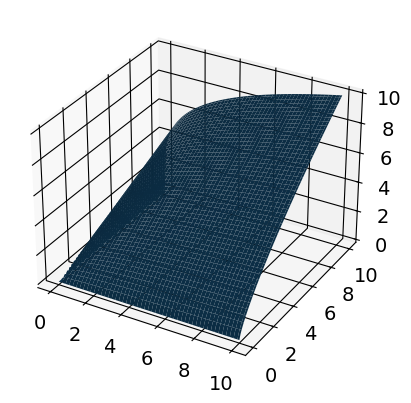

In [13]:
%matplotlib inline
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots

You can make the figure **zoomable** and **panable** using a **widget**:

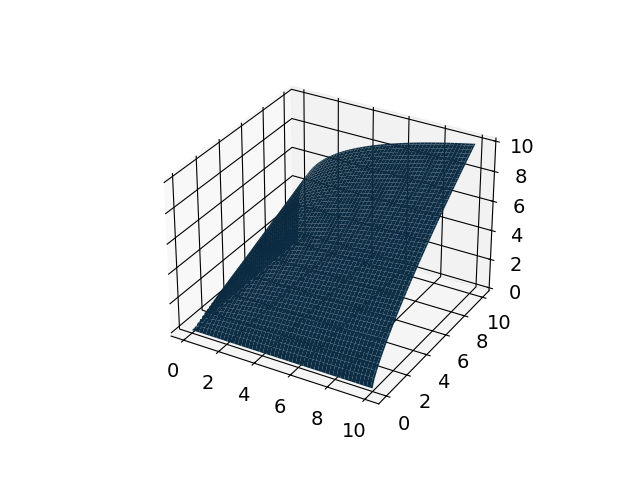

In [14]:
%matplotlib widget
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d axis in the figure 
ax.plot_surface(x1_values,x2_values,u_values); # create surface plot in the axis

Note: If this is not working for you, make sure you did step 1b in the [installation guide](https://sites.google.com/view/numeconcph-introprog/guides/installation), try to update nodejs, ipympl, ipywidgets. Sometimes it's really difficult to get widgets to work so don't hesitate to ask your TA for help. <br>
See [here](https://matplotlib.org/3.2.2/users/navigation_toolbar.html) for navigating (use left-click and mouse to look around, and right-click and mouse to zoom).

To restore normal plotting, turn on `inline`:

In [15]:
%matplotlib inline

**Making it pretty**: Use a colormap and set labels.  

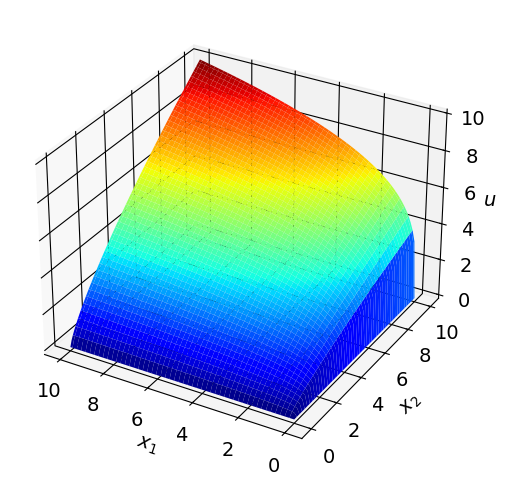

In [16]:
from matplotlib import cm # for colormaps
# a. actual plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_values,x2_values,u_values,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$x_1$') # Notice latex syntax
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')
ax.zaxis.labelpad=0.05

# c. invert xaxis to bring Origin in center front
ax.invert_xaxis()
fig.tight_layout()

Saving your figure is easy:

In [17]:
fig.savefig('someplot.pdf') # or e.g. .png 

**More formatting options?** See these [examples](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py). <br>
Another approach would be to use the [Seaborn package](https://seaborn.pydata.org/tutorial/objects_interface.html) which can create good looking plots. The syntax is however different from matplotlib. As I understand it, the syntax is reminiscent of ggplot2 for R. so if you're used to that seaborn might be for you.

**Task**: Construct the following plot:

![wireframeplot](someplot_wireframe.png)

It's called a wireframe and examples can be found [here](https://www.tutorialspoint.com/matplotlib/matplotlib_3d_wireframe_plot.htm) and [here](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html): 

In [54]:
# write your code here

**Answer:**

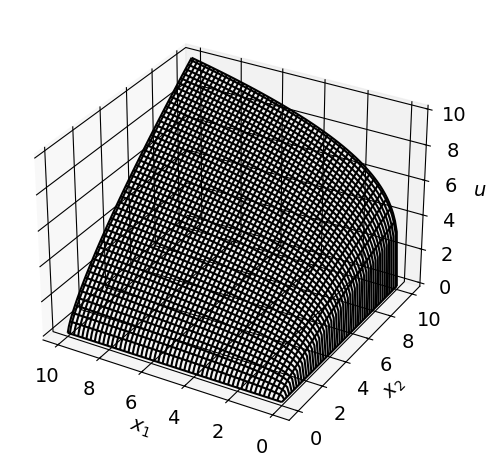

In [18]:
# a. Answer
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x1_values,x2_values,u_values,edgecolor='black')

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# c. invert xaxis
ax.invert_xaxis()

# e. save
fig.tight_layout()
fig.savefig('someplot_wireframe.png')
fig.savefig('someplot_wireframe.pdf')